In [68]:
options(warn = -1)
library(tidyverse)
library(ggpubr)
library(patchwork)

library(dplyr)
suppressMessages(library(tidyverse))
library(MASS)
library(nnet)
library(class)

library(tidyr)
library(rpart)
library(rpart.plot)  
library(rattle)

In [2]:
dat=read.csv(file = 'data.csv',encoding="UTF-8")
head(dat)

,videoId,publishedAt,category,timePeriod,title,duration,definition,caption,madeForKids,views,likes,comments
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,q07RanslaGM,2019-07-12T04:00:04Z,music,before,Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video],PT3M24S,hd,false,False,67572870,903802,23708
2,74yb9E3WY1I,2019-06-28T04:00:00Z,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video],PT3M18S,hd,false,False,85421793,756722,19163
3,_1MnmVjZ__Y,2019-03-19T17:00:09Z,music,before,Lukas Graham - Love Someone [Live at Royal Arena],PT4M42S,hd,false,False,10247816,102336,2089
4,mj0XInqZMHY,2019-06-28T07:00:05Z,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video],PT3M48S,hd,false,False,324855784,2642952,54724
5,uKqRAC-JNOM,2019-02-15T05:00:05Z,music,before,Ariana Grande - bloodline (Audio),PT3M38S,hd,false,False,47656034,490115,10814
6,ryJgDL9jzKk,2019-12-22T10:00:43Z,music,before,Ed Sheeran - Put It All On Me (feat. Ella Mai) [Official Music Video],PT3M38S,hd,false,False,60842509,843427,21250


In [3]:
summary(dat)

   videoId          publishedAt          category          timePeriod       
 Length:897         Length:897         Length:897         Length:897        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    title             duration          definition          caption         
 Length:897         Length:897         Length:897         Length:897        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [4]:
str(dat)

'data.frame':	897 obs. of  12 variables:
 $ videoId    : chr  "q07RanslaGM" "74yb9E3WY1I" "_1MnmVjZ__Y" "mj0XInqZMHY" ...
 $ publishedAt: chr  "2019-07-12T04:00:04Z" "2019-06-28T04:00:00Z" "2019-03-19T17:00:09Z" "2019-06-28T07:00:05Z" ...
 $ category   : chr  "music" "music" "music" "music" ...
 $ timePeriod : chr  "before" "before" "before" "before" ...
 $ title      : chr  "Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video]" "Lukas Graham - Love Someone [Live at Royal Arena]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video]" ...
 $ duration   : chr  "PT3M24S" "PT3M18S" "PT4M42S" "PT3M48S" ...
 $ definition : chr  "hd" "hd" "hd" "hd" ...
 $ caption    : chr  "false" "false" "false" "false" ...
 $ madeForKids: chr  "False" "False" "False" "False" ...
 $ views      : int  67572870 85421793 10247816 324855784 47656034 60842509 9880858 17000817 816253560 48754147

In [5]:
dat$category=as.factor(dat$category)
dat$timePeriod=as.factor(dat$timePeriod)
dat$definition=as.factor(dat$definition)
dat$caption=as.factor(dat$caption)
dat$madeForKids=as.factor(dat$madeForKids)
dat$views=as.numeric(dat$views)
dat$likes=as.numeric(dat$likes)
dat$comments=as.numeric(dat$comments)
summary(dat)

   videoId          publishedAt                 category    timePeriod 
 Length:897         Length:897         comedy       :150   after :297  
 Class :character   Class :character   education    :150   before:300  
 Mode  :character   Mode  :character   entertainment:147   during:300  
                                       music        :150               
                                       news/politics:150               
                                       science/tech :150               
                                                                       
    title             duration         definition  caption    madeForKids
 Length:897         Length:897         hd:869     false:556   False:823  
 Class :character   Class :character   sd: 28     true :341   True : 74  
 Mode  :character   Mode  :character                                     
                                                                         
                                                      

transfer 'duration' from different patterns to seconds by using regular expressions

In [6]:
time1 = strptime(dat$duration,'PT%MM%SS')
index=which(is.na(time1))
dat$duration[index]

[1] "PT3M"       "P0D"        "P0D"        "P0D"        "PT1H11M2S" 
 [6] "PT1H23M46S" "PT1H44M58S" "PT3M"       "P0D"        "PT4M"      
[11] "P0D"        "P0D"        "P0D"        "P0D"        "P0D"       
[16] "PT30S"      "PT45S"      "PT31S"      "PT18S"      "PT21S"     
[21] "PT16M"      "PT2M"       "PT3M"       "PT35S"      "PT1M"      
[26] "PT2M"       "PT3M"       "P0D"        "P0D"        "P0D"       
[31] "P0D"        "P0D"        "PT42S"      "PT1H44M18S" "PT41S"     
[36] "PT4M"       "PT4M"       "PT59S"      "P0D"        "P0D"       
[41] "P0D"        "PT41S"      "PT57S"      "PT1H18S"    "PT21S"     
[46] "PT1M"

In [7]:
time2 <- strptime(dat$duration,'PT%HH%MM%SS')
time3 <- strptime(dat$duration,'PT%MM')
time4 <- strptime(dat$duration,'PT%SS')
time5 <- strptime(dat$duration,'PT%HH%SS')

time=time1
time[index]=time2[index]
index=which(is.na(time))
time[index]=time3[index]
index=which(is.na(time))
time[index]=time4[index]
index=which(is.na(time))
time[index]=time5[index]
dat$duration=time

dat$duration=difftime(dat$duration,Sys.Date(),units='secs')-14400

for (i in 1:ncol(dat)) {
  print(which(is.na(dat[,i])))
}

integer(0)
integer(0)
integer(0)
integer(0)
integer(0)
 [1]  23 115 128 270 321 327 331 336 401 712 716 719 725 733 830 832 835
integer(0)
integer(0)
integer(0)
[1] 118 422 426
 [1] 118 212 228 299 317 422 426 512 537 580 582 586 593 594 804 831 834 835 838
[20] 864 865 895
  [1] 101 120 123 124 125 126 136 137 138 139 140 141 142 143 144 145 146 147
 [19] 148 149 150 158 162 212 217 228 230 231 235 240 241 252 259 260 261 262
 [37] 265 266 269 274 283 292 295 297 299 317 410 412 416 421 423 424 425 430
 [55] 432 434 435 436 438 439 440 441 442 443 444 445 447 448 449 450 460 462
 [73] 468 512 524 527 528 532 534 537 541 558 563 569 570 572 573 574 579 584
 [91] 585 587 588 591 592 595 598 599 600 736 823 831 834 837 849 854 856 858
[109] 867 876 879 887 896


In [8]:
dat=na.omit(dat)

# Models

In [9]:
head(dat)

,videoId,publishedAt,category,timePeriod,title,duration,definition,caption,madeForKids,views,likes,comments
,<chr>,<chr>,<fct>,<fct>,<chr>,<drtn>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,q07RanslaGM,2019-07-12T04:00:04Z,music,before,Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video],204 secs,hd,false,False,67572870,903802,23708
2,74yb9E3WY1I,2019-06-28T04:00:00Z,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video],198 secs,hd,false,False,85421793,756722,19163
3,_1MnmVjZ__Y,2019-03-19T17:00:09Z,music,before,Lukas Graham - Love Someone [Live at Royal Arena],282 secs,hd,false,False,10247816,102336,2089
4,mj0XInqZMHY,2019-06-28T07:00:05Z,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video],228 secs,hd,false,False,324855784,2642952,54724
5,uKqRAC-JNOM,2019-02-15T05:00:05Z,music,before,Ariana Grande - bloodline (Audio),218 secs,hd,false,False,47656034,490115,10814
6,ryJgDL9jzKk,2019-12-22T10:00:43Z,music,before,Ed Sheeran - Put It All On Me (feat. Ella Mai) [Official Music Video],218 secs,hd,false,False,60842509,843427,21250


# Three different levels

In [10]:
dat$viewsQuartile3 <- ntile(dat$views, 3)
dat$likesQuartile3 <- ntile(dat$likes, 3)
dat$commentsQuartile3 <- ntile(dat$comments, 3)

In [69]:
dat=na.omit(dat)

# Y -- views

Split dataset into train and test set

In [70]:
set.seed(101)
data <- dat[, c(3,4,6:15)] %>% mutate(id=row_number())
#randomly sample 80% of data in each species group as the training set
train <- data %>% group_by(viewsQuartile3) %>% sample_frac(0.8) %>% ungroup() 
test <- anti_join(data, train, by = 'id')
# remove the column id
train <- dplyr::select(train, -id)
test <- dplyr::select(test, -id)

1. LDA

In [71]:
# Fit the model
LdaModelForViews = lda(viewsQuartile3 ~ category + timePeriod + definition + caption + madeForKids + duration, data = train)
# Make predictions for testset
LdaPredictionsTestViews <- LdaModelForViews %>% predict(test)
table(predicted=LdaPredictionsTestViews$class, actual=test$viewsQuartile3)
# Model accuracy for test set
cat("Test prediction error:", mean(LdaPredictionsTestViews$class!=test$viewsQuartile3))

         actual
predicted  1  2  3
        1 38 24  4
        2 12 22 11
        3  0  4 35

Test prediction error: 0.3666667

2. QDA

In [73]:
QdaModelForViews = qda(viewsQuartile3 ~ category + timePeriod + definition + caption + madeForKids + duration, data = train)
QdaPredictionsTestViews <- QdaModelForViews %>% predict(test)
table(predicted=QdaPredictionsTestViews$class, actual=test$viewsQuartile3)
cat("Test prediction error:", mean(QdaPredictionsTestViews$class!=test$viewsQuartile3))

ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group 1


3. Multinomial

In [20]:
LRModelForViews <- multinom(viewsQuartile3 ~ category + timePeriod + definition + caption + madeForKids + duration, data = train, probabilities = TRUE, model = TRUE)
LRPredictionsTestViews  <-  predict(LRModelForViews, test)
table(predicted=LRPredictionsTestViews, actual=test$viewsQuartile3)
cat("Test prediction error:", mean(LRPredictionsTestViews!=test$viewsQuartile3))

# weights:  39 (24 variable)
initial  value 663.561822 
iter  10 value 478.615946
iter  20 value 430.773420
iter  30 value 429.026211
iter  40 value 428.954776
final  value 428.954588 
converged


         actual
predicted  1  2  3
        1 41 25  4
        2  8 20 11
        3  1  5 35

Test prediction error: 0.36

4. KNN

In [43]:
train_ = train
train_$category=as.numeric(train_$category)
train_$timePeriod=as.numeric(train_$timePeriod)
train_$duration=as.numeric(train_$duration)
train_$definition=as.numeric(train_$definition)
train_$caption=as.numeric(train_$caption)
train_$madeForKids=as.numeric(train_$madeForKids)

test_ = test
test_$category=as.numeric(test_$category)
test_$timePeriod=as.numeric(test_$timePeriod)
test_$duration=as.numeric(test_$duration)
test_$definition=as.numeric(test_$definition)
test_$caption=as.numeric(test_$caption)
test_$madeForKids=as.numeric(test_$madeForKids)

In [58]:
trainViews_y = train_ %>% .$viewsQuartile3 
trainViews_x <- train_ %>% dplyr::select('category', 'timePeriod', 'duration', 'definition', 'caption', 'madeForKids')

testViews_y = test_ %>% .$viewsQuartile3 
testViews_x = test_ %>% dplyr::select('category', 'timePeriod', "duration", "definition", "caption", "madeForKids")


In [59]:
mean_train = colMeans(trainViews_x)
std_train = sqrt(diag(var(trainViews_x)))
# training data
trainViews_x = scale(trainViews_x, center = mean_train, scale = std_train)
# test data
testViews_x = scale(testViews_x, center = mean_train, scale = std_train)

In [60]:
k_range = c(1, 2, 4, 5, 10, 20, 25, 50, 100, 150, 200, 300, 400)
train_error = c()
test_error = c()
for(i in 1:length(k_range)){
  pred_train <- knn(trainViews_x, 
                      trainViews_x, 
                      trainViews_y,
                      k = k_range[i])
  train_error[i] = mean(pred_train != trainViews_y)
  pred_test = knn(trainViews_x, 
                      testViews_x, 
                      trainViews_y,
                      k = k_range[i])
  test_error[i] = mean(pred_test != testViews_y)
}

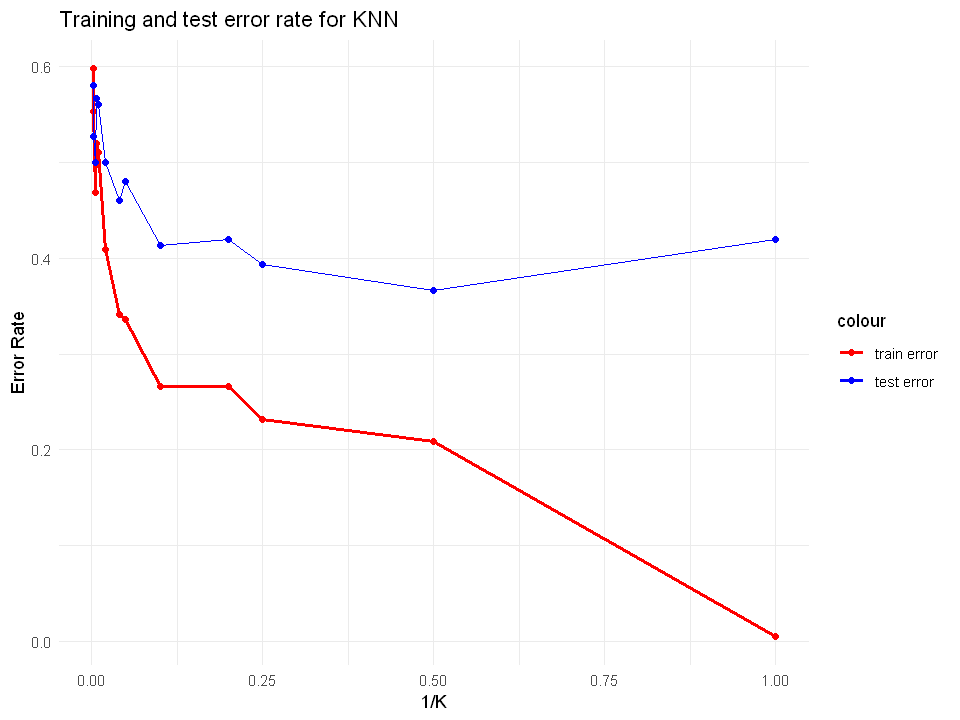

In [61]:
errors = data.frame(train_error, test_error, k_range)
ggplot(errors, aes(x = 1/k_range)) + 
  geom_line(aes(y = train_error, col = "train error"), size=1) + geom_point(aes(y = train_error, col = "train error")) +
  geom_line(aes(y = test_error, col = "test error")) + geom_point(aes(y = test_error, col = "test error")) +
  ylab("Error Rate") + xlab("1/K") + ggtitle("Training and test error rate for KNN") + theme_minimal() +
  scale_color_manual(values = c("train error" = "red", "test error" = "blue"))

5. Classification Tree

In [62]:
tree.gini = rpart(viewsQuartile3 ~ category + timePeriod + definition + caption + madeForKids + duration, train, parms = list(split = "gini"), method = "class")
printcp(tree.gini)


Classification tree:
rpart(formula = viewsQuartile3 ~ category + timePeriod + definition + 
    caption + madeForKids + duration, data = train, method = "class", 
    parms = list(split = "gini"))

Variables actually used in tree construction:
[1] caption    category   duration   timePeriod

Root node error: 402/604 = 0.66556

n= 604 

        CP nsplit rel error  xerror     xstd
1 0.388060      0   1.00000 1.10448 0.026978
2 0.036070      1   0.61194 0.61194 0.030038
3 0.020522      3   0.53980 0.53980 0.029332
4 0.010000      7   0.45771 0.47512 0.028428


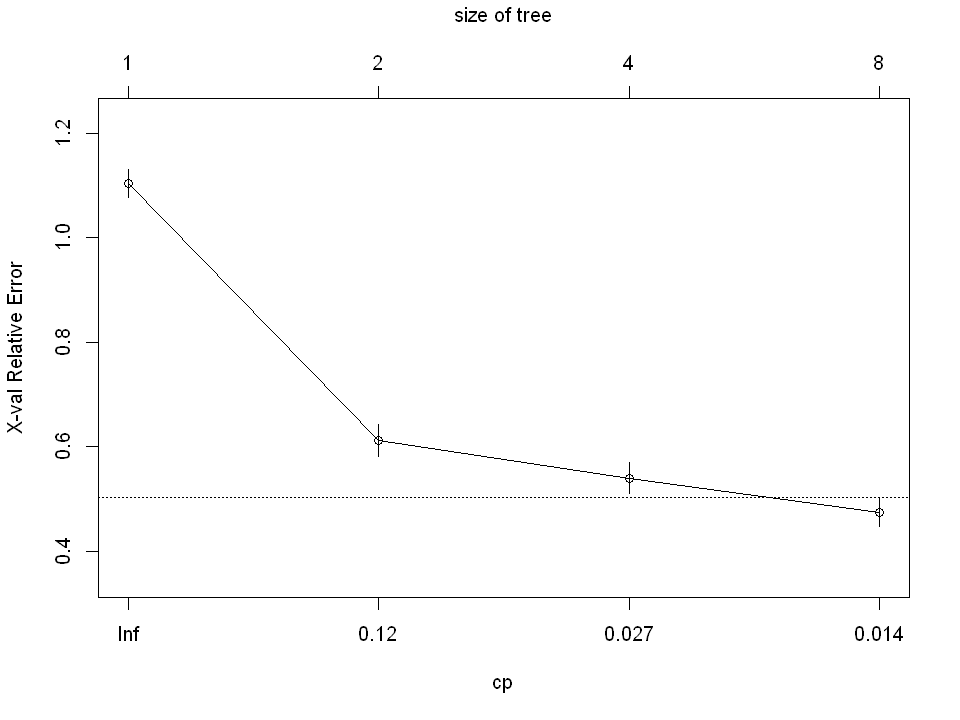

In [63]:
options(repr.plot.width=8, repr.plot.height=6)
plotcp(tree.gini)

6. Random Forest